In [1]:
                                                     #USING SVM

In [2]:
#IMPORTING LIBRARIES

import numpy as np   #linear algebra
import pandas as pd  #data processing
import seaborn as sns   #data visualization

#matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#algorithm
from sklearn.svm import SVC

#getting data
df=pd.read_csv("C:/Users/prati/Downloads/titanic/train.csv")
test=pd.read_csv("C:/Users/prati/Downloads/titanic/test.csv")

In [3]:
#DATA ANALYSIS
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
print(df.describe(include="all"))

        PassengerId    Survived      Pclass               Name   Sex  \
count    891.000000  891.000000  891.000000                891   891   
unique          NaN         NaN         NaN                891     2   
top             NaN         NaN         NaN  Davis, Miss. Mary  male   
freq            NaN         NaN         NaN                  1   577   
mean     446.000000    0.383838    2.308642                NaN   NaN   
std      257.353842    0.486592    0.836071                NaN   NaN   
min        1.000000    0.000000    1.000000                NaN   NaN   
25%      223.500000    0.000000    2.000000                NaN   NaN   
50%      446.000000    0.000000    3.000000                NaN   NaN   
75%      668.500000    1.000000    3.000000                NaN   NaN   
max      891.000000    1.000000    3.000000                NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


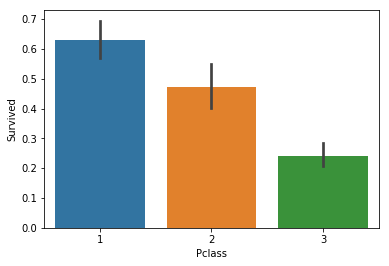

In [7]:
sns.barplot('Pclass','Survived', data=df)

In [8]:
#TO LOOK AT WHAT ACTUAL DATA IS MISSING

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [9]:
#DATA PREPROCESSING- THE DATA WHICH IS NOT IN FURTHER USE SO WE DROP THAT DATA

print(type(df))
dropping = ['PassengerId','Name','Ticket','Cabin']
df.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#FILLING THE MISSING  VALUES

sex = np.zeros(len(df))
sex[df['Sex']== 'male'] = 1
sex[df['Sex']== 'female'] = 0
df['Sex'] = sex

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,S
1,1,1,0.0,38.0,1,0,71.2833,C
2,1,3,0.0,26.0,0,0,7.9250,S
3,1,1,0.0,35.0,1,0,53.1000,S
4,0,3,1.0,35.0,0,0,8.0500,S


In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(df))
Embarked[df['Embarked']== 'C'] = 1
Embarked[df['Embarked']== 'Q'] = 2
Embarked[df['Embarked']== 'S'] = 3
df['Embarked'] = Embarked
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,3.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,3.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,3.0


In [12]:
#GROUPING THE DATA FOR FILLING MISSING VALUES

df['Age'].fillna(df['Age'].mean(),inplace=True)
age = np.zeros(len(df))
age[df['Age']<20] = 1
age[(df['Age']>=20)&(df['Age']<60)] = 2
age[(df['Age']>=60)] = 3
df['Age'] = age
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,2.0,1,0,7.2500,3.0
1,1,1,0.0,2.0,1,0,71.2833,1.0
2,1,3,0.0,2.0,0,0,7.9250,3.0
3,1,1,0.0,2.0,1,0,53.1000,3.0
4,0,3,1.0,2.0,0,0,8.0500,3.0


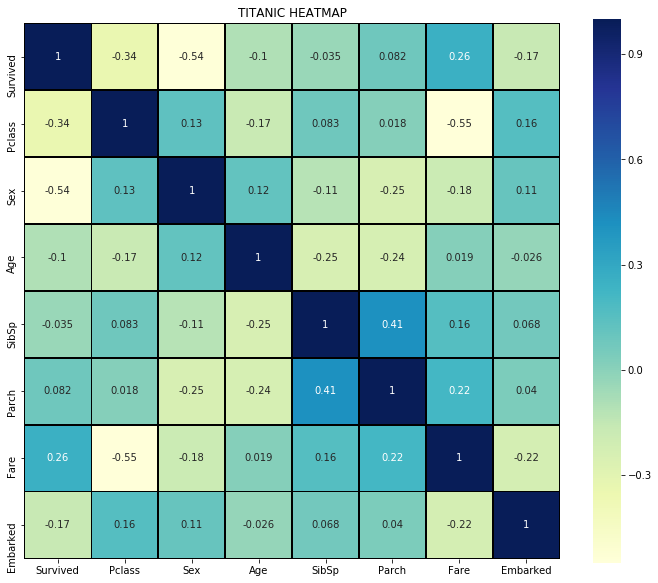

In [13]:
#DATA  VISUALIZATION USING Heat map
f, ax = plt.subplots(figsize=(12, 10))
plt.title('TITANIC HEATMAP')
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [14]:
#converting features
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [16]:
#MODELLING DATA
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
kf = KFold(n_splits=10,random_state=1)
svc = SVC(C = 30, gamma = 0.01)
svc.fit(X_train, Y_train) 

acc_SVM = 100*cross_val_score(svc,X_train,Y_train,cv=kf)
print(acc_SVM.mean())

80.47315855181024


In [17]:
                                          #using 3 layer neural network

In [18]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import itertools
import time
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context('poster')

In [19]:
#data exploration
df = pd.read_csv("C:/Users/prati/Downloads/titanic/train.csv", usecols=['Survived','Pclass','Sex','Age','Fare'])
df = df.fillna(df.mean())
df = df.round()
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())
sum(df.Survived)/len(df)

   Survived  Pclass     Sex   Age  Fare
0         0       3    male  30.0   8.0
1         1       3  female  30.0   8.0
2         0       2    male  21.0  74.0
3         1       3  female  30.0  22.0
4         1       1    male  32.0  30.0


0.3838383838383838

In [20]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

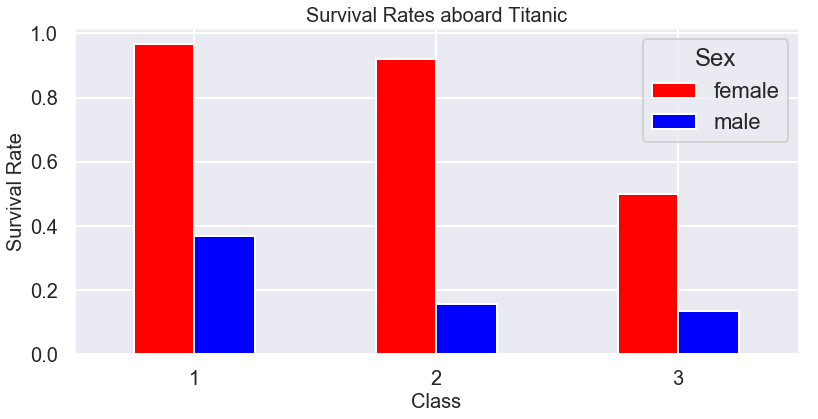

In [21]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar',figsize=(13,6), fontsize=20, color=['r','b']);
plt.ylabel('Survival Rate',fontsize=20)
plt.title('Survival Rates aboard Titanic',fontsize=20);
plt.xlabel('Class',fontsize=20);
plt.xticks([0,1,2],rotation=0);

In [22]:
df= pd.get_dummies(df,'Sex')
X = df.as_matrix(columns=['Pclass','Age','Sex_female','Sex_male','Fare'])
Y = df.as_matrix(columns=['Survived'])
# normalize age and fare
X[:,1] = (X[:,1] - X[:,1].min())/(X[:,1].max() - X[:,1].min())
X[:,4] = (X[:,4] - X[:,4].min())/(X[:,4].max() - X[:,4].min())

C:\Users\prati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\prati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#TSNE is used to visually inspect it and see if there are any clear clusters.

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0, perplexity=15, n_iter=2000, n_iter_without_progress=1000)
matrix_2d = tsne.fit_transform(X)

In [24]:
df_tsne = pd.DataFrame(matrix_2d)
df_tsne['Survived'] = df['Survived']
#df_tsne['color'] = colors
df_tsne.columns = ['x','y', 'Survived',]
# rearrange columns
cols = ['Survived','x','y']
df_tsne = df_tsne[cols]
# show the 2D coordinates of the TSNE output
df_tsne.head()

,Survived,x,y
0,0,21.845749,-24.727707
1,1,34.262165,27.849072
2,0,15.162586,-76.501236
3,1,42.360561,36.347786
4,1,-41.805389,-21.943712


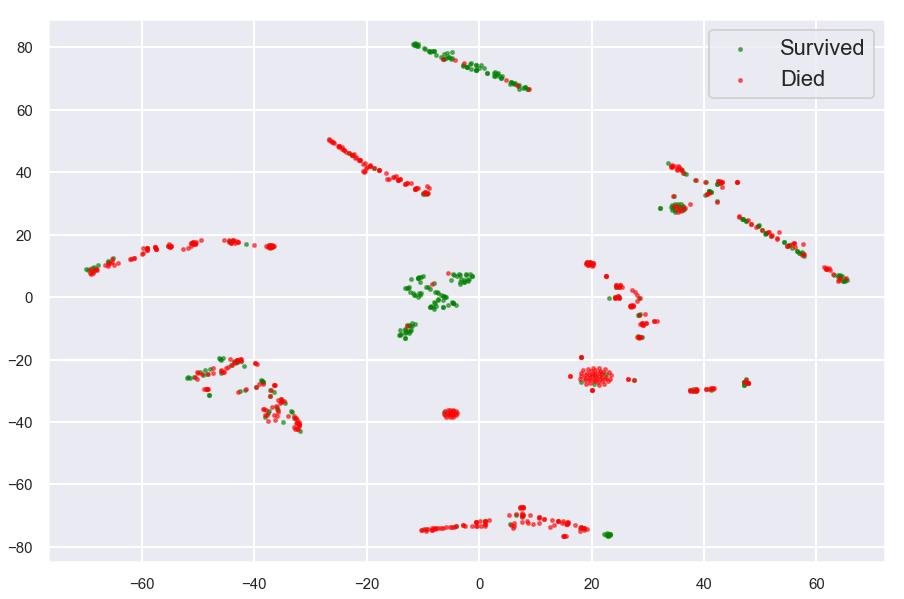

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df_tsne[df_tsne.Survived==1].x.values, df_tsne[df_tsne.Survived==1].y.values,
           c='green', s=10, alpha=0.5, label='Survived')
ax.scatter(df_tsne[df_tsne.Survived==0].x.values, df_tsne[df_tsne.Survived==0].y.values,
           c='red', s=10, alpha=0.5, label='Died')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend()
plt.show()

In [26]:
data = df.as_matrix()

# normalize age and fare

data[:,2] = (data[:,2] - data[:,2].min())/(data[:,2].max() - data[:,2].min())
data[:,3] = (data[:,3] - data[:,3].min())/(data[:,3].max() - data[:,3].min())
X_train, X_test = train_test_split(data, test_size=0.1)
Y_train = X_train[:,0] # first column is class
Y_train = np.reshape(Y_train, newshape=(len(Y_train),1)) # reshape to a columns vector
X_train = X_train[:,1:] # select all columns but class
Y_test = X_test[:,0]
Y_test = np.reshape(Y_test, newshape=(len(Y_test),1)) # reshape to a columns vector
X_test = X_test[:,1:]

C:\Users\prati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [27]:
#sigmoid activation function

def sigmoid(x, deriv=False):

    if(deriv==True):
        return (x*(1-x))
    return 1/(1+np.exp(-x))

In [28]:
#leaky ReLU activation function

def relu(x, deriv=False):

    if deriv == True:
        x[x<0] = 0.01
        x[x>0] = 1.
        return x
    x[x<0] = 0.01*x[x<0]
    return x

In [29]:
def predict(x, w0, w1, b1, b2):
    #Function to predict an output given a data x, weight matrices w1 & w1 and biases b1 &b2
   
    A = np.dot(x,w0) + b1 # mXN X NxH +1xH ~ mxH
    layer_1 = relu(A)
    B = np.dot(layer_1,w1) + b2 # mxH X Hx1 ~ mx1 (preds)
    layer_2 = B
    return (sigmoid(layer_2) > 0.5).astype(int)

In [30]:
def get_batch(x,y,i,batchSize=32):

    #Function that returns a minibatch of a dataset
    
    return x[i:i+batchSize],y[i:i+batchSize]

In [33]:
#learning rate, hidden layer dimension, dropout rate, batch size
alpha, hidden_size, drop_rate, batch_size = (0.04,32,0.5,32)

# randomly initialise synapses
syn0 = 2*np.random.random((X_train.shape[1],hidden_size)) - 1 # NxH
syn1 = 2*np.random.random((hidden_size,1)) - 1 # Hx1

# randomly initialise biases
b1 = np.random.randn(hidden_size) # 1xH
b2 = np.random.randn(1) # 1x1
avg_err = []

for epoch in range(2000):
    err = []

    for i in range(int(X_train.shape[0]/batch_size)):

        x,y = get_batch(X_train,Y_train,i,batch_size)

        # Forward
        layer_0 = x
        A = np.dot(layer_0,syn0) + b1 # BxN X NxH ~ BxH
        layer_1 = relu(A)
        # drop out to reduce overfitting
        layer_1 *= np.random.binomial([np.ones((len(x),hidden_size))],1-drop_rate)[0] * (1/(1-drop_rate))

        B = np.dot(layer_1,syn1) + b2 # BxH X Hx1 ~ Bx1
        layer_2 = sigmoid(B)

        # Backpropogation
        layer_2_error = layer_2 - y # Bx1
        layer_2_delta = layer_2_error * sigmoid(layer_2,deriv=True)  #Bx1 * Bx1 ~ Bx1

        layer_1_error = np.dot(layer_2_delta,syn1.T)     # Bx1 X 1xH ~ BxH
        layer_1_delta = layer_1_error * relu(layer_1,deriv=True) # BxH * BxH ~ BxH

        # update weights
        syn1 -= alpha*np.dot(layer_1.T,layer_2_delta) # HxB X Bx1 ~ Hx1
        syn0 -= alpha*np.dot(layer_0.T,layer_1_delta) # NxB X BxH ~ NxH

        # update biases
        m = len(y)
        b2 -= alpha * (1.0 / m) * np.sum(layer_2_delta)
        b1 -= alpha * (1.0 / m) * np.sum(layer_1_delta)

        err.append(layer_2_error)

    avg_err.append(np.mean( np.abs(err) ))
    if epoch%500 == 0:
        print("Epoch: %d, Error: %.8f" % (epoch, np.mean( np.abs(err) )))

Epoch: 0, Error: 0.35876547
Epoch: 500, Error: 0.30986008
Epoch: 1000, Error: 0.29698666
Epoch: 1500, Error: 0.30728448


In [34]:
# accuracy on training set
acc_NN=100*(1-np.sum(np.abs(predict(X_train, syn0, syn1, b1, b2) - Y_train))/len(X_train))
print(acc_NN)

79.02621722846442


In [53]:
#comparing svm to a 3 layer neural network by plotting different types of graphs

import plotly.graph_objects as go

MODELS=['SVM','NN']
ACCURACY=[acc_SVM.mean(), acc_NN]
fig = go.Figure([go.Bar(x=MODELS, y=ACCURACY)]
                
fig.update_layout(title_text='ACCURACY OF MODELS')
fig.show()

In [49]:
import plotly.graph_objects as go

MODELS = ['SVM','NN']
ACCURACY = [acc_SVM.mean(),acc_NN]

fig = go.Figure(data=[go.Pie(labels=MODELS, values=ACCURACY)])
fig.update_layout(title_text='ACCURACY OF MODELS')
fig.show()



In [48]:
import plotly.graph_objects as go
colors = ['gold', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['SVM','NN'], 
                             values=[acc_SVM.mean(),acc_NN])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='ACCURACY OF MODELS')
fig.show()